In [2]:
import numpy as np
import random
import time
import gym
from collections import defaultdict
import itertools
import matplotlib
import matplotlib.style
import pandas as pd
import sys
matplotlib.style.use('ggplot')
import plotting
import numpy as np

In [32]:
class environment:
    def __init__(self):
        self.env_rows = 4
        self.env_columns = 4
        self.actions = ['up', 'right', 'down', 'left']
        self.q_values = np.zeros((env_rows, env_columns, len(self.actions)))
        self.rewards = np.full((env_rows, env_columns), -1)
        self.rewards[0,2] = 100
        self.fire = {}
        self.fire[0] = []
        self.fire[1] = [1,3]
        self.fire[2] = []
        self.fire[3] = [0,2]
        for row_index in range(self.env_rows):
            for column_index in self.fire[row_index]:
                self.rewards[row_index,column_index] = -100

In [33]:
env = environment()

In [36]:
env_rows = env.env_rows
env_columns = env.env_columns
actions = env.actions
q_values = env.q_values
rewards = env.rewards
fire = env.fire
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left

In [37]:
rewards

array([[  -1,   -1,  100,   -1],
       [  -1, -100,   -1, -100],
       [  -1,   -1,   -1,   -1],
       [-100,   -1, -100,   -1]])

In [38]:
def is_terminal_state(current_row_index, current_column_index):
    if rewards[current_row_index, current_column_index] == -1:
        return False
    else:
        return True

In [39]:
def get_starting_location():
    current_row_index = np.random.randint(1, env_rows - 1)
    current_column_index = np.random.randint(1, env_columns - 1)
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(1, env_rows-1)
        current_column_index = np.random.randint(1, env_columns-1)
    return current_row_index, current_column_index

def get_next_action(current_row_index, current_column_index, epsilon):
#if a randomly chosen value between 0 and 1 is less than epsilon, 
#then choose the most promising value from the Q-table for this state.
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else:   #choose random action
        return np.random.randint(4)

def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index  > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < env_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < env_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

In [40]:
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else: #if this is a 'legal' starting location
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
        while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
            action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
            current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
        return shortest_path

In [41]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the agent should learn
num_episodes = 2000
episode_lengths = np.zeros(num_episodes)
episode_rewards = np.zeros(num_episodes)
#run through 1000 training episodes
for episode in range(num_episodes):
  #get the starting location for this episode
    row_index, column_index = get_starting_location()
  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the fire or the goal state
    while not is_terminal_state(row_index, column_index):
    #choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
    #perform the chosen action, and transition to the next state (i.e., move to the next location)
        old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
    #receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        
        episode_rewards[episode] += reward
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
    #update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value
    
print('Training complete!')

Training complete!


In [44]:
print(get_shortest_path(3, 3))

[[3, 3], [2, 3], [2, 2], [1, 2], [0, 2]]


In [45]:
episode_rewards

array([100.,  99., 100., ...,  99., 100.,  98.])

In [46]:
import matplotlib.pyplot as plt

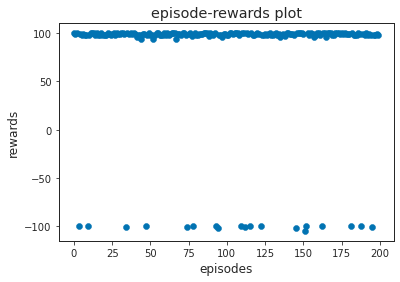

In [47]:
#plt.scatter([i for i in range(num_episodes)], episode_rewards)
plt.scatter([i for i in range(200)], episode_rewards[:200])
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.title('episode-rewards plot')
plt.show()

## using ready made environment

In [ ]:
env = gym.make("FrozenLake8x8-v1")

In [ ]:
np.zeros((4,4,4))

In [ ]:
gym.envs.registry

In [ ]:
class environment

In [ ]:
def epsilongreedy(Q, epsilon, num_actions):
    def policyfunction(state):
        action_probabilities = np.ones(num_actions, dtype = float) * epsilon/num_actions
        best_action = np.argmax(Q[state])
        action_probabilities[best_action] += (1.0- epsilon)
        return action_probabilities
    return policyfunction

In [ ]:
class stats:
    def __init__(self, episode_rewards, episode_lengths):
        self.episode_reward = episode_rewards
        self.episode_length = episode_lengths

In [ ]:
def qlearning(env, num_episodes, discount_factor = 1.0, alpha = 0.6, epsilon = 0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    episode_lengths = np.zeros(num_episodes)
    episode_rewards = np.zeros(num_episodes)
    
    policy = epsilongreedy(Q, epsilon, env.action_space.n)
    
    #for every episode i
    for i in range(num_episodes):
        
        state = env.reset()
        
        for t in itertools.count():
            action_probabilities = policy(state)
            
            #choose actions according to probability distribution
            action = np.random.choice(np.arange(len(action_probabilities)),
                                     p = action_probabilities)
            
            #take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)
            
            #update statistics
            episode_rewards[i] += reward
            episode_lengths[i] = t
            
            #TD update
            
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha *td_delta

            if done:
                break
            state = next_state
        return Q, episode_lengths, episode_rewards

In [ ]:
Q, episode_lengths, episode_rewards = qlearning(env, 1000)

In [ ]:
episode_lengths, episode_rewards